In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pace_neutrons import Matlab
m = Matlab()

# Set SpinW to use mex files:
swp = m.swpref()
swp.usemex = 1

Trying MATLAB version: 2022b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2022b.ctf))
Searching for Matlab 9.13 in /opt/matlab2021b
Searching for Matlab 9.13 in /opt
Trying MATLAB version: 2021b (/mnt/ceph-training/course_materials/pace_env/lib/python3.11/site-packages/pace_neutrons/ctfs/pace_2021b.ctf))
Searching for Matlab 9.11 in /opt/matlab2021b
Found Matlab 9.11 glnxa64 at /opt/matlab2021b
Interface opened
All features have moved to hor_config


!==================================================================!
!          ISIS utilities for visualization and analysis           !
!                   of neutron spectroscopy data                   !


All features have moved to hor_config

!==================================================================!

!------------------------------------------------------------------!
!   Visualisation of multi-dimensional neutron spectroscopy data   !

!                                 

## Excercise 4: A polarised neutron example (Ba$_3$NbFe$_3$Si$_2$O$_{14}$)

In this exercise, we’ll look at Ba$_3$NbFe$_3$Si$_2$O$_{14}$ - a langasite which has a non-centrosymmetric chiral crystal structrure which then leads to a chiral magnetic structure and thence to chiral excitations 

Loire et al., PRL 106 207201 (2011). 

https://link.aps.org/pdf/10.1103/PhysRevLett.106.207201


1. To get you started quickly, use the following template and fill in which bond correspond to which exchange `Jn` according to the Fig. 1 of the PRL paper (replace the “???” and uncomment the `addcoupling` lines)

Creating the bond list (maxDistance = 8 Å, nCell = 2x2x2)...

...30 bonds are retained out of 675 generated!

Creating 3D plot... 

...10k faces and 5k vertices are drawn!



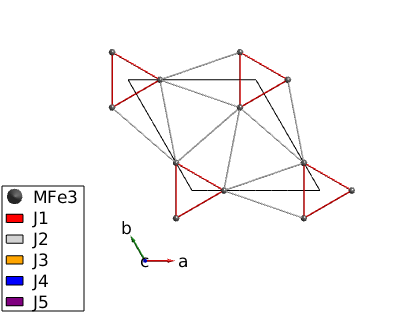

In [2]:
banb = m.spinw()
banb.genlattice('lat_const',[8.539, 8.539, 5.2414], 'angled',[90, 90, 120],'sym','P 3 2 1')
banb.addatom('label','MFe3','r',[0.24964, 0, 1/2],'S',5/2,'color','gray')
banb.gencoupling()

# Values from PRL 106 207201

J1 = 0.85;
J2 = 0.24;
J3 = 0.053;
J4 = 0.017;
J5 = 0.24;

banb.addmatrix('value',J1,'label','J1','color','red')
banb.addmatrix('value',J2,'label','J2','color','lightgray')
banb.addmatrix('value',J3,'label','J3','color','orange')
banb.addmatrix('value',J4,'label','J4','color','b')
banb.addmatrix('value',J5,'label','J5','color','purple')

banb.addcoupling('mat', 'J1', 'bond', 1) 
banb.addcoupling('mat', 'J2', 'bond', 3) 
banb.addcoupling('mat', 'J3', 'bond', 5) 
banb.addcoupling('mat', 'J4', 'bond', 2) 
banb.addcoupling('mat', 'J5', 'bond', 4)

m.plot(banb,'range',[[-0.5, 1.5], [-0.5, 1.5], [0, 1.5]]) 

2. Now we can uses the `optmagstr` and `gm_planar` functions to try to find the optimum magnetic structure.
  
   Do you understand how the code works (if not ask a demonstrator)?
   
   What do the parameters `x0` to `gm_planar` mean?
   
   Why have the values of `xmin` and `xmax` been chosen? 

                                        

100.00%, remained: 000:00:00 (HH:MM:SS).

Creating 3D plot... 


...18k faces and 10k vertices are drawn!



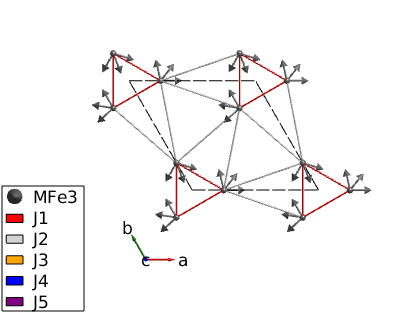

In [8]:
n_spin = len(banb.matom()['S'][0]) # 3 spins
x0   = [0, 2*np.pi/3, 4*np.pi/3, 0, 0, 1/7, 0, 0]; 
xmin = len(x0)*[0]; 
xmax = [2*np.pi, 2*np.pi, 2*np.pi, 0, 0, 1, 0, 0]; 

# setup initial structure
func = m.eval('@gm_planar')
banb.genmagstr('mode', 'func', 'func', func, 'x0', x0)

# optimise
func = m.eval('@gm_planar')
optres = banb.optmagstr('func', func, 'xmin', xmin, 'xmax', xmax, 'tolfun', 1e-9) 

# Rotate the spin so the first spin is along the a-axis 
xfit = optres['x'][0]; 
xfit[:n_spin] = xfit[:n_spin] - xfit[0] 
banb.genmagstr('mode', 'func', 'func', func, 'x0', xfit)

m.plot(banb,'range',[[-0.5, 1.5], [-0.5, 1.5], [0, 2.5]]) 

Answer:

`x0` sets a 120° structure on the trimer equating to the εΔ=+1 chirality (defined by φ=0, 120° and 240°), the next three parameters define the `k=(0,0,1/7)` k-vector and the last two defines the z-axis as the axis of rotation.

`xmin` and `xmax` have been chosen to fix `kx` and `ky` and the rotation plane but allow the `phi` parameters and `kz` to vary. 

3. Run the above code several times and look at the plot of the optimised structure – each time when the code results in a non-zero propagation vector, what is the chirality of the triangles εΔ? (compare to Fig. 1 in the PRL paper)?
  
   What is the chirality of the helix εH? Is there a relation between them? Run the code again until you get εΔ=-1 and εH=1 as in the PRL paper. 

Answer: Depending on the random number generator in the fitting, you can either get εΔ=-1 and εH=+1, or εΔ=+1 and εH=-1 – and you should thus infer that εΔεH=-1 (in fact εΔεH= εT the structural chirality which defines the exchange parameters). 

4. Calculate the spin wave dispersion from (0, -1, 1) to (0, -1, -2), but before you plot the dispersion (before running ``sw_egrid``) run ``sw_neutron`` with the `'pol', True` option and also set `'uv', ([0 1 0], [0 0 1])` to calculate the polarised neutron cross-sections and define the horizontal scattering plane as the (0kl) plane. Then run sw_egrid with `'component', 'Sperp'` to plot the unpolarised cross-section and then rerun the plot with `sw_egrid` with `'component', '-Myz+Mzy'` to plot the chiral cross-section.
  
    Compare your plots with those in the PRL paper.

Calculating INCOMMENSURATE spin wave spectra (nMagExt = 3, nHkl = 1500, nTwin = 1)...

No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        

Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.


 String scalar or character vector must have valid interpreter syntax: 
Convoluted spectra: Im }(\omega,Q) -M^{yz}(\omega,Q) +M^{zy}(\omega,Q), T =   0.0 K



 String scalar or character vector must have valid interpreter syntax: 
Im }(\omega,Q) -M^{yz}(\omega,Q) +M^{zy}(\omega,Q)




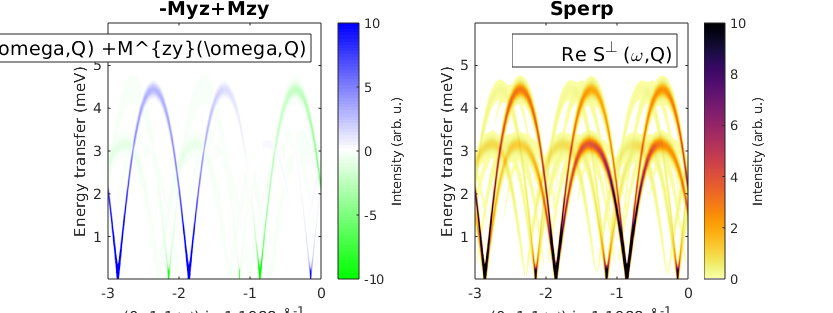

In [14]:
spec = banb.spinwave(([0, -1, 1], [0, -1, -2], 500));
spec = m.sw_neutron(spec,'pol',True,'uv',([0, 1, 0], [0, 0, 1]));
en = np.linspace(0,6,500)
dE = 0.25

# unpolarised
spec = m.sw_egrid(spec,'component','Sperp','Evect',en); 
# polarised
comp = '-Myz+Mzy'
spec_pol = m.sw_egrid(spec,'component',comp,'Evect',en); 

%matlab_fig -w 800 -h 300 -r 100

m.figure("color", "white")
f1 = m.subplot(1,2,1)
m.sw_plotspec(spec_pol,'mode','color','dE',0.25,'axLim',[-10,10],'imag',True);
m.title(comp)
f2 = m.subplot(1,2,2)
m.sw_plotspec(spec,'mode','color','dE',0.25,'axLim',[0, 10]);
m.title("Sperp")
m.colormap(f1, m.makecolormap([0, 1, 0], [1, 1, 1], [0, 0, 1], 81))

Note the situation with the exchange parameters J1-J5 described by the paper corresponds to a structural chirality εT=-1 - you can get the other case by swapping the values of J3 and J5). Note that we’re using `'Mzy-Myz'` as the component instead of `'Myz-Mzy'` because it seems that the definition of the xyz coordinate system for the polarised neutron cross-section is opposite in the PRL paper compared to that in SpinW. The `<My>`, `<Mz>` components are in principle defined by x||Q, z vertical and y = x × z but it seems that in the paper this is taken as the negative of x × z. (note that in the online version of this tutorial, it was chosen to use the negative of Q instead of swapping the polarised components.) 

----

Unfortunately the next two examples are not working in the Python version of SpinW due to some bugs so you'll have to use Matlab for this.

Go to "Applications" -> "Software" -> "Matlab R2021b"

Then copy the file `day4_spinw2.m` to your home folder and double click on it in Matlab to open and follow the instructions.